# n-queen problem using Memetic algorithm

لگوریتم‌های ممتیک (به انگلیسی: Memetic algorithm) تکنیک جستجو در علم رایانه برای یافتن راه‌حل تقریبی برای بهینه‌سازی مدل، ریاضی و مسائل جستجو است. الگوریتم ممتیک نوع خاصی از الگوریتم‌های تکاملی است. الگوریتم‌های ممتیک یکی از الگوریتم‌های جستجوی تصادفی است که ایده آن برگرفته از طبیعت می‌باشد.در طبیعت از ترکیب کروموزوم‌های بهتر، نسل‌های بهتری پدید می‌آیند. در این بین گاهی اوقات جهش‌هایی نیز در کروموزوم‌ها روی می‌دهد که ممکن است باعث بهتر شدن نسل بعدی شوند. الگوریتم ممتیک نیز با استفاده از این ایده اقدام به حل مسائل می‌کند. روند استفاده از الگوریتم‌های ممتیک به صورت زیر می‌باشد: 

الف) معرفی جواب‌های مسئله به عنوان کروموزوم

ب) معرفی تابع برازندگی یا فیتنس
ج)جمع‌آوری اولین جمعیت 

د) معرفی عملگرهای انتخاب

ه)  معرفی عملگرهای تولید مثل

در الگوریتم‌های ممتیک ابتدا به‌طور تصادفی یا الگوریتمیک، چندین جواب برای مسئله تولید می‌کنیم. این مجموعه جواب را جمعیت اولیه می‌نامیم. هر جواب را یک کروموزوم می‌نامیم. سپس با استفاده از عملگرهای الگوریتم ممتیک پس از انتخاب کروموزوم‌های بهتر، کروموزوم‌ها را باهم ترکیب کرده و جهشی در آن‌ها ایجاد می‌کنیم. در نهایت نیز جمعیت فعلی را با جمعیت جدیدی که از ترکیب و جهش در کروموزوم‌ها حاصل می‌شود، ترکیب می‌کنیم. 

در این مثال می‌خواهیم مسئلهٔ ۸ وزیر را بوسیلهٔ این الگوریتم حل کنیم. هدف مشخص کردن چیدمانی از ۸ وزیر در صفحهٔ شطرنج است به نحوی که هیچ‌یک همدیگر را تهدید نکند. ابتدا باید نسل اولیه را تولید کنیم. صفحه شطرنج ۸ در ۸ را در نظر بگیرید. ستون‌ها را با اعداد ۰ تا ۷ و سطرها را هم از ۰ تا ۷ مشخص می‌کنیم. برای تولید حالات (کروموزومها) اولیه به صورت تصادفی وزیرها را در ستون‌های مختلف قرار می‌دهیم. باید در نظر داشت که وجود نسل اولیه با شرایط بهتر سرعت رسیدن به جواب را افزایش می‌دهد (اصالت نژاد) به همین خاطر وزیر i ام را در خانهٔ تصادفی در ستون i ام قرار می‌دهیم (به جای اینکه هر مهره‌ای بتواند در هر خانه خالی قرار بگیرد). با اینکار حداقل از برخورد ستونی وزیرها جلوگیری می‌شود. 

## ابتدا کتابخانه هایی که نیاز داریم را ایمپورت میکنیم و ورودی را از کاربر میگیریم



In [193]:
import random
import numpy as np
import time

# حال توابع کلاس های مورد نظر را تعریف میکنیم

مراحل و توابع اساسی یک الگوریتم ژنتیک برای مسئله n-queens به شرح زیر است:

مقداردهی اولیه: یک جمعیت اولیه از n کروموزوم ایجاد کنید، جایی که هر کروموزوم یک راه حل ممکن برای مشکل را نشان می دهد. در مورد مسئله n-queens، هر کروموزوم مربوط به آرایش منحصر به فردی از ملکه ها روی تخته است.

ارزیابی فیتنس: تناسب هر کروموزوم در جمعیت را ارزیابی کنید. در مورد مسئله n-queens، تابع فیتنس امتیازی به هر کروموزوم بر اساس تعداد جفت ملکه هایی که به یکدیگر حمله می کنند، اختصاص می دهد.

انتخاب: مناسب ترین کروموزوم ها را از جمعیت انتخاب کنید تا والدین نسل بعدی باشند. این معمولاً با استفاده از یک روش انتخاب مانند انتخاب چرخ رولت یا انتخاب مسابقه ای انجام می شود.

متقاطع: با ترکیب اطلاعات ژنتیکی کروموزوم های والدین، کروموزوم های فرزندان جدیدی ایجاد کنید. در مورد مسئله n-queens، این کار را می توان با استفاده از تکنیک هایی مانند متقاطع یک نقطه ای یا دو نقطه ای انجام داد.

جهش: ایجاد تغییرات تصادفی کوچک در کروموزوم های فرزندان برای ارتقای تنوع در جمعیت. در مورد مسئله n-queens، این کار را می توان با تعویض تصادفی موقعیت های دو ملکه روی تخته انجام داد.

تولید تعدادی از همسایه های یک جواب و پیدا کردن بهترین جواب در کل همسایگی.(local search)

تکرار: مراحل 2-6 را تکرار کنید تا زمانی که راه حل رضایت‌بخشی پیدا شود یا یک معیار توقف برآورده شود (مثلاً به حداکثر تعداد نسل رسیده است).

خاتمه: هنگامی که یک راه حل رضایت بخش یافت شد، الگوریتم را خاتمه دهید و بهترین کروموزوم (یعنی کروموزوم با بالاترین امتیاز تناسب اندام) را به عنوان راه حل برای مشکل برگردانید.

با دنبال کردن این مراحل، یک الگوریتم ژنتیک می‌تواند فضای راه‌حل‌های ممکن برای مسئله n-queens را جستجو کند و در یک زمان نسبتاً کوتاه، حتی برای مقادیر بزرگ n، روی یک جواب تقریباً بهینه همگرا شود.

In [227]:

class MemeticAlgorithm:
    def __init__(self, pop_size, board_size):
        self.board_size = board_size
        self.board = []
        self.pop_size = pop_size
        self.population = [np.array(random.sample(
            range(self.board_size), self.board_size)) for i in range(pop_size)]
        self.fitness_arr = [0 for i in range(self.pop_size)]
        self.fitness_array_function()

    def sort_pop_by_fitness(self):
        n = self.pop_size
        swapped = False
        for i in range(n):
            for j in range(0, n-i-1):
                if self.fitness_arr[j] > self.fitness_arr[j + 1]:
                    swapped = True
                    self.fitness_arr[j], self.fitness_arr[j +
                                                          1] = self.fitness_arr[j + 1], self.fitness_arr[j]
                    self.population[j], self.population[j +
                                                        1] = self.population[j + 1], self.population[j]
            if not swapped:
                return

    def fitness_function(self, chromosome):
        number_of_conflicts = 0
        for i in range(self.board_size):
            for j in range(i+1, self.board_size):
                # print(i,j,chromosome)
                if chromosome[i] == chromosome[j]:
                    number_of_conflicts += 1
                if abs(i-j) == abs(chromosome[i]-chromosome[j]):
                    number_of_conflicts += 1
        # print('finish')
        return 1 - ((number_of_conflicts - 0.5)  / (self.board_size*(self.board_size - 1)/2) )

    def fitness_array_function(self):
        for ind in range(self.pop_size):
            current_fitness = self.fitness_function(self.population[ind])
            self.fitness_arr[ind] = current_fitness
            # if current_fitness == 1:
            #     return True
        # self.fitness_arr.sort(reverse=True)
        return self.fitness_arr

    def crossover(self, chromosome_A, chromosome_B):
        n = len(chromosome_A)
        # Choose two random crossover points
        point1 = random.randint(0, n-2)
        point2 = random.randint(point1+1, n-1)
        # Create two empty child arrays
        child1 = [None]*n
        child2 = [None]*n

        child1[point1:point2] = chromosome_A[point1:point2]
        child2[point1:point2] = chromosome_B[point1:point2]

        for i in range(n):
            if child1[i] == None:
                if chromosome_B[i] not in child1:
                    child1[i] = chromosome_B[i]
            if child2[i] == None:
                if chromosome_A[i] not in child2:
                    child2[i] = chromosome_A[i]

        # Copy genetic material from parents to children

        # Fill in remaining genetic material using the other parent
        for i in range(n):
            if child1[i] == None:
                for j in range(n):
                    if j not in child1:
                        child1[i] = j
            if child2[i] == None:
                for j in range(n):
                    if j not in child2:
                        child2[i] = j

        child1_fitness = self.fitness_function(child1)
        child2_fitness = self.fitness_function(child2)
        if child1_fitness > child2_fitness:
            return child1
        return child2

    def mutation(self, chromosome, mutation_prob):

        n = len(chromosome)
        if random.random() < mutation_prob:
            number_of_mutation = random.randint(0, int(0.2*self.board_size))
            for _ in range(number_of_mutation):
                index1 = random.randint(0, self.board_size-1)
                index2 = random.randint(0, self.board_size-1)
                chromosome[index1], chromosome[index2] = chromosome[index2], chromosome[index1]
        return chromosome
    
    def get_neighbor(self,chromosome,method='negation'):
        neighbor = chromosome.copy()
        if method=='swap':
            neighbor = chromosome.copy()
            req_1,req_2 = random.sample(range(self.n_item),2)
            neighbor[req_1], neighbor[req_2] = neighbor[req_2], neighbor[req_1]
        return neighbor
    
    def local_search(self,chromosome,number_of_neighbors=10,random_p=0.2):
        neighbors_arr = [chromosome]
        neighbors_arr_fitnesses= [self.fitness_function(chromosome)]
        counter = 0
        limit_count = 0
        while counter < number_of_neighbors and limit_count<number_of_neighbors*5:
            neighbor = self.get_neighbor(chromosome,neighbors_arr_fitnesses[0])
            if neighbor not in neighbors_arr:
                neighbors_arr.append(neighbor)
                fitness = self.fitness_function(neighbor)
                neighbors_arr_fitnesses.append(fitness)
                counter += 1
            limit_count += 1

        best_fitness = neighbors_arr_fitnesses[0]
        fitness_id = 0
        for i in range(len(neighbors_arr)):
            if neighbors_arr_fitnesses[i] < best_fitness:
                fitness_id = i
                best_fitness = neighbors_arr_fitnesses[i]
        if random.random()<random_p:
            fitness_id = random.randint(0,len(neighbors_arr)-1)
        return neighbors_arr[fitness_id]

    def select(self, method='tournoment'):
        if method == 'tournoment':
            # random_population_index = np.array(random.sample(range(self.pop_size),self.pop_size))

            new_generation = []
            for i in range(0, self.pop_size):
                random_candidates = np.array(
                    random.sample(range(self.pop_size), 20))

                max_index1 = max(random_candidates,
                                 key=lambda j: self.fitness_arr[j])
                first_parent = (
                    max_index1, self.population[max_index1], self.fitness_arr[max_index1])

                # max_index2, second_parent=-1,-1
                # while (max_index2!=max_index1):
                random_candidates = np.array(
                    random.sample(range(self.pop_size), 20))
                max_index2 = max(random_candidates,
                                 key=lambda j: self.fitness_arr[j])
                second_parent = (
                    max_index2, self.population[max_index2], self.fitness_arr[max_index2])

                new_child = self.crossover(first_parent[1], second_parent[1])

                new_child = self.local_search(new_child,number_of_neighbors=20)
                
                new_child = self.mutation(new_child, 0.8)
                new_generation.append(new_child)

            new_generation.sort(key=lambda item: self.fitness_function(item))
            self.sort_pop_by_fitness()
            # self.population[0:len(new_generation)-1]=new_generation
            for index in range(len(new_generation)):
                if self.fitness_function(new_generation[index]) > self.fitness_arr[index]:
                    self.population[index] = new_generation[index]

            # self.population=np.concatenate(( new_generation, self.population[self.pop_size-len(new_generation)+1:]), axis=0)
            # self.population = self.population[0:self.pop_size-len(new_generation)] + new_generation
            self.fitness_arr = self.fitness_array_function()

        elif method == 'ranked':
            new_generation = []
            self.sort_pop_by_fitness()
            self.fitness_arr = self.fitness_array_function()
            for i in range(self.pop_size-1):
                first_parent = self.population[i]
                second_parent = self.population[i+1]

                new_child = self.crossover(first_parent, second_parent)
                mutation_prob = random.random()
                new_child = self.mutation(new_child, mutation_prob)
                new_generation.append(new_child)

                self.population[0:len(new_generation)-1] = new_generation

            self.fitness_arr = self.fitness_array_function()

    def build_board(self):
        self.sort_pop_by_fitness()
        arr = self.population[-1]
        self.board = [[0 for i in range(len(arr))] for j in range(len(arr))]
        for i in range(len(arr)):
            self.board[i][arr[i]] = 1
        return arr

    def print_board(self):
        for i in range(self.board_size):
            for j in range(self.board_size):
                print(self.board[i][j], end='  ')
            print('\n')
        self.fitness_arr[self.pop_size-1] = 1.0


In [195]:
number_of_queens = [8,12,15,20,40]
populations      = [28,40,48,60,80]
ith_generations  = [0,0,0,0,0]
time_cost        = [0,0,0,0,0]

In [196]:
def nqueen(pop,n):
    # print(f"n={number_of_queens[i]}, pop={populations[i]}")
    t_start = time.time()
    board = MemeticAlgorithm(pop, n)
    i=0
    while (max(board.fitness_arr) < 1):
        board.select()
        i+=1
    t_cost = time.time()-t_start
    ith_gen = i
    board.build_board()
    board.print_board()
    print(
        f"{n}-queens problem solved in generation {i}th with population of{pop} in time {t_cost}")
    print(f"max fitness is: {max(board.fitness_arr)}")
    print('----------------------------------------')
    return (ith_gen, t_cost)


In [197]:
ith_generations[0],time_cost[0] = nqueen(n=number_of_queens[0],pop=populations[0])

0  0  0  0  1  0  0  0  

0  0  1  0  0  0  0  0  

1  0  0  0  0  0  0  0  

0  0  0  0  0  1  0  0  

0  0  0  0  0  0  0  1  

0  1  0  0  0  0  0  0  

0  0  0  1  0  0  0  0  

0  0  0  0  0  0  1  0  

8-queens problem solved in generation 29th with population of28 in time 0.08540129661560059
max fitness is: 1.0
----------------------------------------


In [198]:

ith_generations[1],time_cost[1] = nqueen(n=number_of_queens[1],pop=populations[1])


0  0  0  0  0  1  0  0  0  0  0  0  

0  0  1  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  1  0  0  

0  0  0  0  0  0  0  0  0  0  0  1  

0  0  0  1  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  1  0  0  0  

0  0  0  0  0  0  1  0  0  0  0  0  

0  1  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  1  0  

0  0  0  0  0  0  0  1  0  0  0  0  

1  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  1  0  0  0  0  0  0  0  

12-queens problem solved in generation 3th with population of40 in time 0.021065711975097656
max fitness is: 1.0
----------------------------------------


In [203]:
ith_generations[2],time_cost[2] = nqueen(n=number_of_queens[2],pop=populations[2])


0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  

0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  

0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  

0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  

0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  

1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  

0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  

15-queens problem solved in generation 16th with population of48 in time 0.1608564853668213
max fitness is: 1.0
----------------------------------------


In [230]:
ith_generations[3],time_cost[3] = nqueen(n=number_of_queens[3],pop=populations[3])


0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  

0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  

0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  

0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  

1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0 

In [220]:
ith_generations[4],time_cost[4] = nqueen(n=number_of_queens[4],pop=populations[4])


0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  

0  0  0  0  0  0  0  0  

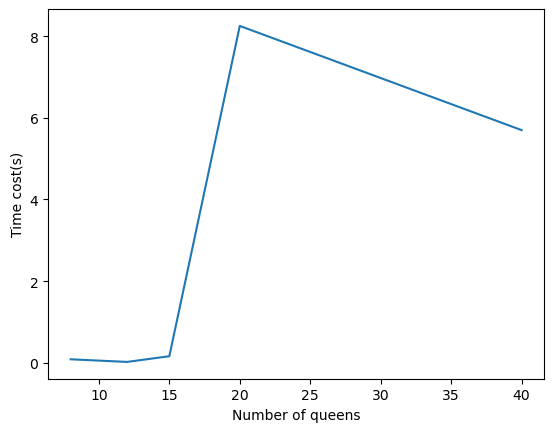

In [232]:
import matplotlib.pyplot as plt

plt.plot(number_of_queens, time_cost)
plt.xlabel("Number of queens")
plt.ylabel("Time cost(s)")

plt.show()
